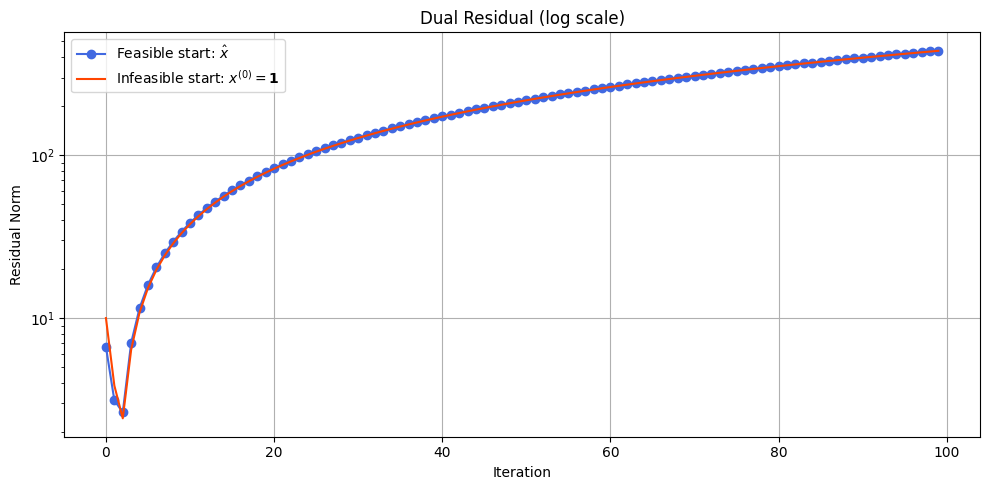

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Problem setup
num_vars = 100
num_eqs = 30

# Generate a full rank A matrix
while True:
    A_matrix = np.random.randn(num_eqs, num_vars)
    if np.linalg.matrix_rank(A_matrix) == num_eqs:
        break

# Generate a feasible point x̂ with positive entries
x_true = np.random.rand(num_vars) + 0.1
b_vector = A_matrix @ x_true


def run_newton_dual(A, b, x_start, max_iters=100, tolerance=1e-8):
    n = len(x_start)
    p = A.shape[0]
    x = x_start.copy()
    lagrange = np.zeros(p)
    dual_res_history = []

    for _ in range(max_iters):
        grad = 1 + np.log(x)
        hess = np.diag(1 / x)
        hess_inv = np.diag(x)

        # Dual residual
        dual_res = grad + A.T @ lagrange
        dual_res_history.append(np.linalg.norm(dual_res))

        if np.linalg.norm(dual_res) < tolerance:
            break

        # Elimination method
        hess_inv_AT = hess_inv @ A.T
        hess_inv_grad = hess_inv @ grad
        schur = -A @ hess_inv_AT
        delta_lagrange = np.linalg.solve(schur, A @ hess_inv_grad - (A @ x - b))
        delta_x = np.linalg.solve(hess, -A.T @ delta_lagrange - grad)

        # Line search
        step_size = 1.0
        while np.any(x + step_size * delta_x <= 0):
            step_size *= 0.5

        x += step_size * delta_x
        lagrange += step_size * delta_lagrange

    return dual_res_history


# Initial points
x_init_feasible = x_true.copy()
x_init_infeasible = np.ones(num_vars)

# Run Newton's method
dual_res_feasible = run_newton_dual(A_matrix, b_vector, x_init_feasible)
dual_res_infeasible = run_newton_dual(A_matrix, b_vector, x_init_infeasible)

# Plot dual residuals
plt.figure(figsize=(10, 5))
plt.semilogy(dual_res_feasible, label=r'Feasible start: $\hat{x}$', color='royalblue', marker='o')
plt.semilogy(dual_res_infeasible, label=r'Infeasible start: $x^{(0)} = \mathbf{1}$', color='orangered') #, marker='s'

plt.title('Dual Residual (log scale)')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
